# Chapter10 
## Unsupervised Learning

Most of this book concerns supervised learning methods such as regression and classification.But This chapter will instead focus on unsupervised learning, a set of statistical tools intended for the setting in which we have only a set of features $X_1, X_2, . . . , X_p$ measured on $n$ observations.

We are not interested in prediction, because we do not have an associated response variable $Y$ . Rather, the goal is to discover interesting things about the measurements on $X_1, X_2, . . . , X_p$.Is there an informative way to visualize the data? Can we discover subgroups among the variables or among the observations? 

In this chapter, we will focus on two particular types of unsupervised learning: principal components analysis, a tool used for data visualization or data pre-processing before supervised techniques are applied, and clustering, a broad class of methods for discovering unknown subgroups in data.

## 10.1 The Challenge of Unsupervised Learning

Supervised learning is a well-understood area. For instance, if you are asked to predict a binary outcome from a data set, you have a very well developed set of tools at your disposal (such as logistic regression, linear discriminant analysis, classification trees, support vector machines, and more) as well as a clear understanding of how to assess the quality of the results obtained (using cross-validation, validation on an independent test set, and so forth).

In contrast, unsupervised learning is often much more challenging. The exercise tends to be more subjective, and there is no simple goal for the analysis, such as prediction of a response.**Unsupervised learning is often performed as part of an exploratory data analysis.**

Furthermore, it can exploratory data analysis be hard to assess the results obtained from unsupervised learning methods, since there is no universally accepted mechanism for performing crossvalidation or computing validating results on an independent data set.The reason for this difference is simple. If we fit a predictive model using a supervised learning technique, then it is possible to check our work by seeing how well our model predicts the response $Y$ on observations not used in fitting the model. However, in unsupervised learning, there is no way to check our work because we don’t know the true answer — the problem is unsupervised.

## 10.2 Principal Components Analysis

Principal components are discussed in Section 6.3.1 in the context of principal components regression. When faced with a large set of correlated variables, principal components allow us to summarize this set with a smaller number of representative variables that collectively explain most of the variability in the original set. Principal component analysis (PCA) refers to the process by which prin- principal component analysis cipal components are computed, and the subsequent use of these components in understanding the data.

PCA is an unsupervised approach, since it involves only a set of features $X_1, X_2, . . . , X_p$, and no associated response $Y$ . Apart from producing derived variables for use in supervised learning problems, PCA also serves as a tool for data visualization (visualization of the observations or visualization of the variables).


### 10.2.1  What Are Principal Components?

Suppose that we wish to visualize n observations with measurements on a set of p features, $X_1, X_2, . . . , X_p$, as part of an exploratory data analysis.We could do this by examining two-dimensional scatterplots of the data, each of which contains the $n$ observations’ measurements on two of the features. However, there are $p(p−1)/2$ such scatterplots, for example, with $p = 10$ there are 45 plots! If $p$ is large, then it will certainly not be possible to look at all of them; moreover, most likely none of them will be informative since they each contain just a small fraction of the total information present in the data set. Clearly, a better method is required to visualize the n observations when p is large. In particular, we would like to find a low-dimensional representation of the data that captures as much of the information as possible. For instance, if we can obtain a two-dimensional representation of the data that captures most of the information, then we can plot the observations in this low-dimensional space.

PCA provides a tool to do just this. It finds a low-dimensional represen tation of a data set that contains as much as possible of the variation. The idea is that each of the $n$ observations lives in p-dimensional space, but not all of these dimensions are equally *interesting*. PCA seeks a small number of dimensions that are as *interesting* as possible, where the concept of *interesting* is measured by the amount that the observations vary along each dimension. Each of the dimensions found by PCA is a linear combination of the $p$ features.

The first principal component of a set of features $X_1, X_2, . . . , X_p$ is the normalized linear combination of the features:
$$
Z_1=\phi_{11}X_1+\phi_{21}X_2+…+\phi_{p1}X_p \tag{10.1}
$$
that has the largest variance.By normalized, we mean that $ {\textstyle \sum_{j=1}^{p}} \phi_{j1}^2=1$. We refer to the elements $\phi_{11}, . . . , \phi_{p1}$ as the *loadings* of the first principal component We constrain the *loadings* so that their sum of squares is equal to one, since otherwise setting these elements to be arbitrarily large in absolute value could result in an arbitrarily large variance.

#### -------------------------------------------------------

Given a $n × p$ data set $X$, how do we compute the first principal component? Since we are only interested in variance, we assume that each of the variables in $X$ has been centered to have mean zero (that is, the column means of $X$ are zero). We then look for the linear combination of the sample feature values of the form
$$
z_1=\phi_{11}x_i1+\phi_{21}x_i2+…+\phi_{p1}x_ip \tag{10.2}
$$
that has largest sample variance, subject to the constraint that $ {\textstyle \sum_{j=1}^{p}} \phi_{j1}^2=1$. In other words, the first principal component loading vector solves the optimization problem:
$$
maximize\left \{ \frac{1}{n}\sum_{i=1}^{n}\left ( \sum_{j=1}^{p}\phi_{ji}^2x_{ij}  \right )^2    \right \} s.t{\textstyle \sum_{j=1}^{p}} \phi_{j1}^2=1\tag{10.3}
$$
From (10.2) we can write the objective in (10.3) as $\frac{1}{n} {\textstyle \sum_{i=1}^{n}}z_{i1}^2 $.Since $\frac{1}{n} {\textstyle \sum_{i=1}^{n}}x_{ij}^2$, the average of the $z_{11}, . . . , z_{n1}$ will be zero as well. Hence the objective that we are maximizing in (10.3) is just the sample variance of the n values of $z_{i1}$. We refer to $z_{11}, . . . , z_{n1}$ as the scores of the first prinscore
cipal component.

After the first principal component $Z_1$ of the features has been determined, we can find the second principal component $Z_2$. The second principal component is the linear combination of $X_1, X_2, . . . , X_p$ that has maximal variance out of all linear combinations that are uncorrelated with $Z_1$.The second principal component scores can be discribed as $z_{12}, z_{22}, . . . , z_{n2}$.

Once we have computed the principal components, we can plot them against each other in order to produce low-dimensional views of the data. For instance, we can plot the score vector $Z_1$ against $Z_2$, $Z_1$ against $Z_3$, $Z_2$ against $Z_3$, and so forth. Geometrically, this amounts to projecting the original data down onto the subspace spanned by $\phi_{11}, . . . , \phi_{p1}$, and plotting the projected points.

#### -------------------------------------------------------

We illustrate the use of PCA on the *USArrests data* set. For each of the fifty states in the United States, the data set contains the number of arrests per 100, 000 residents for each of three crimes: Assault, Murder, and Rape. We also record UrbanPop (the percent of the population in each state living in urban areas). The principal component score vectors have length $n = 50$, and the principal component loading vectors have length $p = 4$. PCA was performed after standardizing each variable to have mean zero and standard deviation one.

Figure below plots the first two principal components of these data. The figure represents both the principal component scores and the
loading vectors in a single biplot display. The loadings are also given in biplot Table below.
![title](fig\fig1.png)
![title](fig\fig2.png)

we see that the first loading vector places approximately equal weight on Assault, Murder, and Rape, with much less weight on UrbanPop. Hence this component roughly corresponds to a measure of overall rates of serious crimes. The second loading vector places most of its weight on UrbanPop and much less weight on the other three features. Hence, this component roughly corresponds to the level of urbanization of the state.

### 10.2.2 Another Interpretation of Principal Components

In the previous section, we describe the principal component loading vectors as the directions in feature space along which the data vary the most, and the principal component scores as projections along these directions. However, an alternative interpretation for principal components can also be useful: **principal components provide low-dimensional linear surfaces that are closest to the observations.** The appeal of this interpretation is clear: we seek a single dimension of the data that lies as close as possible to all of the data points, since such a line will likely provide a good summary of the data.
![title](fig\fig3.png)
The notion of principal components as the dimensions that are closest to the $n$ observations extends beyond just the first principal component. For instance, the first two principal components of a data set span the plane that is closest to the n observations, in terms of average squared **Euclidean distance**.

Using this interpretation, together the first $M$ principal component score vectors and the first $M$ principal component loading vectors provide the best M-dimensional approximation (in terms of Euclidean distance) to the $i^(th)$ observation $x_{ij}$ . This representation can be written:
$$
x_{ij}\approx \sum_{m=1}^{M}z_{im}\phi_{jm}\tag{10.5} 
$$
In other words, together the $M$ principal component score vectors and $M$ principal component loading vectors can give a good approximation to the data when $M$ is sufficiently large.

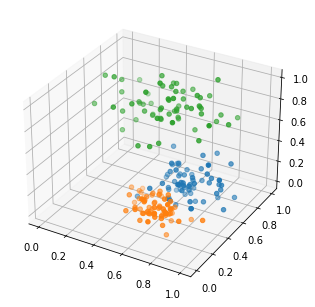

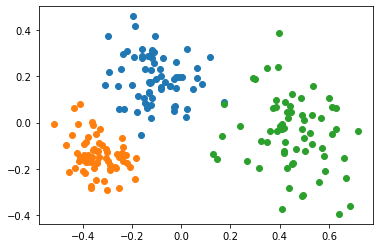

In [2]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import mglearn
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram,ward,average,complete

#获取数据
X,y=make_blobs(n_samples=200,
               n_features=3,
               centers=3,
               cluster_std=[1.5,1.0,2.0],
               random_state=0
               )
#原始数据
X=MinMaxScaler().fit_transform(X)
fig=plt.figure()
ax = Axes3D(fig)
for i in range(3):
    x=X[y==i]
    ax.scatter(x[:,0],x[:,1],x[:,2])
plt.show()
#PCA平面
pca=PCA(n_components=2).fit(X)
X_pca=pca.transform(X)
fig,ax= plt.subplots(1,1,)
for i in range(3):
    x_pca=X_pca[y==i]
    ax.scatter(x_pca[:,0],x_pca[:,1])
plt.show()

### 10.2.3 More on PCA

#### 1. Scaling the Variables

We have already mentioned that before PCA is performed, the variables should be centered to have mean zero. Furthermore, **the results obtained when we perform PCA will also depend on whether the variables have been individually scaled** (each multiplied by a different constant).This is in contrast to some other supervised and unsupervised learning techniques, such as linear regression, in which scaling the variables has no effect.
![title](fig\fig4.png)
Why does it matter that we scaled the variables? In these data, the variables are measured in different units; Murder, Rape, and Assault are
reported as the number of occurrences per 100, 000 people, and UrbanPop is the percentage of the state’s population that lives in an urban area. These four variables have variance 18.97, 87.73, 6945.16, and 209.5, respectively. Consequently, if we perform PCA on the unscaled variables, then the first principal component loading vector will have a very large loading for Assault, since that variable has by far the highest variance.

**we scale each variable to have standard deviation one before we perform PCA, but if the expression is measured in the same “units” for each gene, we might choose not to scale the genes to each have standard deviation one**

#### 2. Uniqueness of the Principal Components

Each principal component loading vector is unique, up to a sign flip. This means that two different software packages will yield the same principal component loading vectors, although the signs of those loading vectors may differ.The signs may differ because each principal component loading vector specifies a direction in p-dimensional space: **flipping the sign has no effect as the direction does not change.** Similarly, the score vectors are unique up to a sign flip, since the variance of $Z$ is the same as the variance of $−Z$. It is worth noting that when we use (10.5) to approximate $x_{ij}$ we multiply $z_{im}$ by $\phi_{jm}$. Hence, if the sign is flipped on both the loading and score vectors, the final product of the two quantities is unchanged.

#### 3. The Proportion of Variance Explained

In above Figure, we performed PCA on a three-dimensional data set (left-hand panel) and projected the data onto the first two principal component loading vectors in order to obtain a two-dimensional view of the data (i.e. the principal component score vectors; right-hand panel)

We see that this two-dimensional representation of the three-dimensional data does successfully capture the major pattern in the data: the orange, green, and cyan observations that are near each other in three-dimensional space remain nearby in the two-dimensional representation.

We can now ask a natural question: **how much of the information in a given data set is lost by projecting the observations onto the first few principal components? That is, how much of the variance in the data is not contained in the first few principal components?** More generally, we are interested in knowing the proportion of variance explained (PVE) by each proportion of variance explained principal component. The total variance present in a data set (assuming that the variables have been centered to have mean zero) is defined as:
$$
\sum_{j=1}^{p}Var(X_j)= \sum_{j=1}^{p}\frac{1}{n} \sum_{i=1}^{n}x_{ij}^2\tag{10.6}
$$
and the variance explained by the $m^{th}$ principal component is:
$$
\frac{1}{n}\sum_{i=1}^{n} z_{im}^2=\frac{1}{n}  \sum_{i=1}^{n}(\sum_{j=1}^{p}\phi_{jm}x_{ij})^2\tag{10.7}
$$
Therefore, the PVE of the $m^{th}$ principal component is given by:
$$
\frac{\sum_{i=1}^{n}(\sum_{j=1}^{p}\phi_{jm}x_{ij})^2}{\sum_{j=1}^{p} \sum_{i=1}^{n}x_{ij}^2} \tag{10.8}
$$
The PVE of each principal component is a positive quantity. In order to compute the cumulative PVE of the first $M$ principal components, we can simply sum (10.8) over each of the first $M$ PVEs.

#### 4. Deciding How Many Principal Components to Use

we usually are not interested in all of them; rather, we would like to use just the first few principal components in order to visualize or interpret the data. In fact, we would like to use the smallest number of principal components required to get a good understanding of the data. How many principal components are needed? Unfortunately, there is no single (or simple!) answer to this question.
![title](fig\fig5.png)

* We typically decide on the number of principal components required to visualize the data by examining a scree plot, such as the one shown in the left-hand panel of Figure
* In practice, we tend to look at the first few principal components in order to find interesting patterns in the data. If no interesting patterns are found in the first few principal components, then further principal components are unlikely to be of interest.
* We can compute principal components for use in a supervised analysis, such as the principal components regression then there is a simple and objective way to determine how many principal components to use: **we can treat the number of principal component score vectors to be used in the regression as a tuning parameter to be selected via cross-validation or a related approach.**

### 10.2.4 Other Uses for Principal Components

We saw in Section 6.3.1 that we can perform regression using the principal component score vectors as features. In fact, many statistical techniques, such as regression, classification, and clustering, can be easily adapted to use the $n × M$ matrix whose columns are the first $M ≪ p$ principal component score vectors, rather than using the full $n × p$ data matrix. This can lead to less noisy results, since it is often the case that the signal (as opposed to the noise) in a data set is concentrated in its first few principal components.

## 10.3  Clustering Methods

Clustering refers to a very broad set of techniques for finding subgroups, or clustering clusters, in a data set. When we cluster the observations of a data set, we seek to partition them into distinct groups so that the observations within each group are quite similar to each other, while observations in different groups are quite different from each other.

Both clustering and PCA seek to simplify the data via a small number of summaries, but their mechanisms are different:
* PCA looks to find a low-dimensional representation of the observations that explain a good fraction of the variance;
* clustering looks to find homogeneous subgroups among the observations.

Since clustering is popular in many fields, there exist a great number of clustering methods. In this section we focus on perhaps the two best-known clustering approaches: **K-means clustering** and **hierarchical clustering.**

### 10.3.1 K-means clustering

K-means clustering is a simple and elegant approach for partitioning a data set into $K$ distinct, non-overlapping clusters. To perform K-means clustering, we must first specify the desired number of clusters $K$; then the K-means algorithm will assign each observation to exactly one of the $K$ clusters.
![title](fig\fig6.png)

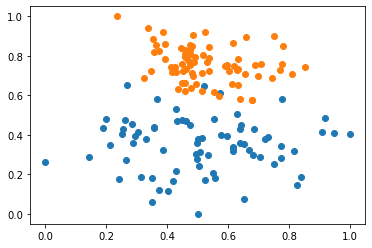

In [3]:
#获取数据
X,y=make_blobs(n_samples=150,
               n_features=2,
               centers=2,
               cluster_std=[1.25,0.75],
               random_state=4
               )
#原始数据
X=MinMaxScaler().fit_transform(X)
fig,ax= plt.subplots(1,1,)
for i in range(2):
    x=X[y==i]
    ax.scatter(x[:,0],x[:,1])
plt.show()

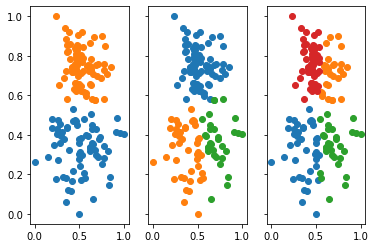

In [4]:
fig,ax=plt.subplots(nrows=1,ncols=3,sharey=True,)
for i in range(3):
    kmeans=KMeans(n_clusters=2+i).fit(X)
    y_kmeans=kmeans.predict(X)
    for j in range(len(set(y_kmeans))):
        x=X[y_kmeans==j]
        ax[i].scatter(x[:,0],x[:,1])

The idea behind K-means clustering is that a good clustering is one for which the within-cluster variation is as small as possible. The within-cluster variation for cluster $C_k$ is a measure $W(C_k)$ of the amount by which the observations within a cluster differ from each other. Hence we want to solve the problem:
$$
minimize{\sum_{k=1}^{K}W(C_k)}\tag{10.9}
$$
In words, this formula says that we want to partition the observations into $K$ clusters such that the total within-cluster variation, summed over all $K$ clusters, is as small as possible.

Solving (10.9) seems like a reasonable idea, but in order to make it actionable we need to define the within-cluster variation. There are many possible ways to define this concept, but by far the most common choice involves squared Euclidean distance. That is, we define:
$$
W(C_k)=\frac{1}{\left | C_k \right | } \sum_{i,i'\in C_k}\sum_{j=1}^{p} (x_{ij}-x_{i'j})^2\tag{10.10}
$$
where $|Ck|$ denotes the number of observations in the kth cluster. In other words, the within-cluster variation for the kth cluster is the sum of all of the pairwise squared Euclidean distances between the observations in the $k^{th}$ cluster, divided by the total number of observations in the $k^{th}$ cluster. Combining (10.9) and (10.10) gives the optimization problem that defines K-means clustering:
$$
minimize\left \{  \frac{1}{\left | C_k \right | } \sum_{i,i'\in C_k}\sum_{j=1}^{p} (x_{ij}-x_{i'j})^2\right \}\tag{10.11}
$$


Now, we would like to find an algorithm to solve (10.11)
![title](fig\fig7.png)
![title](fig\fig8.png)


In [ ]:
#K-means过程示意图
mglearn.plots.plot_kmeans_algorithm()    

### 10.3.2  Hierarchical Clustering

Hierarchical clustering is an alternative approach which does not require that we commit to a particular choice of $K$. Hierarchical clustering has an added advantage over K-means clustering in that it results in an attractive tree-based representation of the observations, called a dendrogram.In this section, we describe bottom-up or agglomerative clustering. This bottom-up agglomerative is the most common type of hierarchical clustering, and refers to the fact that a dendrogram is built starting from the leaves and combining clusters up to the trunk.

#### 1. Interpreting a Dendrogram

We begin with the simulated data set shown in Figure, consisting of 45 observations in two-dimensional space.
![title](fig\fig9.png)

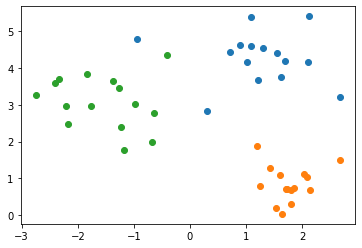

In [6]:
#获取数据
X,y=make_blobs(n_samples=45,
               n_features=2,
               centers=3,
               cluster_std=[0.75,0.5,0.75],
               random_state=0
               )
#原始数据
fig,ax= plt.subplots(1,1,)
for i in range(3):
    x=X[y==i]
    ax.scatter(x[:,0],x[:,1])
plt.show()

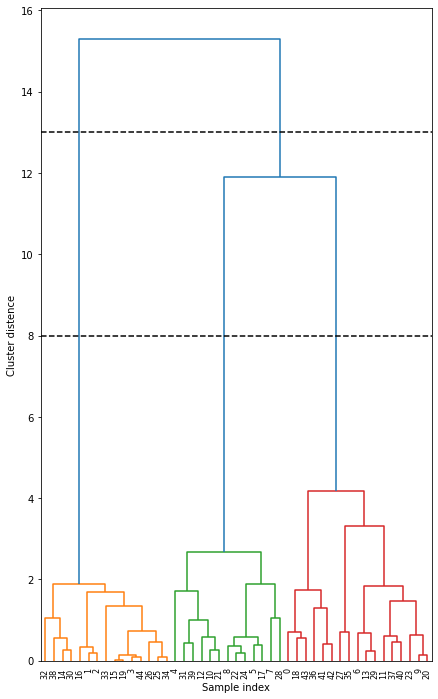

In [7]:
fig,ax= plt.subplots(nrows=1,ncols=1,figsize=(7,12))
linkage_array=ward(X)
dendrogram(linkage_array,ax=ax)
bounds=ax.get_xbound()
ax.plot(bounds,[13.0,13.0],'--',c='k')
ax.plot(bounds,[8.0,8.0],'--',c='k')
plt.xlabel("Sample index")
plt.ylabel("Cluster distence")
plt.show()

Now that we understand how to interpret the left-hand panel of Figure above, we can move on to the issue of identifying clusters on the basis of a dendrogram. In order to do this, we make a horizontal cut across the dendrogram, as shown in the center and right-hand panels of Figure below.

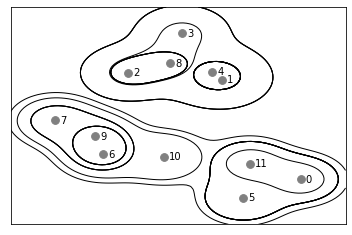

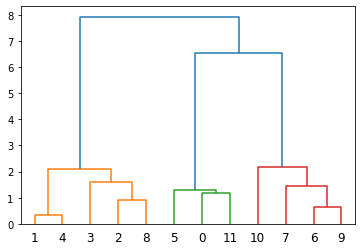

In [8]:
mglearn.plots.plot_agglomerative()
plt.show()
X1,y1=make_blobs(random_state=0,n_samples=12)
linkage_array=ward(X1)
dendrogram(linkage_array)
plt.show()

In the case of Figure above, one might choose to select either two or three clusters. However, often the choice of where to cut the dendrogram is not so clear.The term hierarchical refers to the fact that clusters obtained by cutting the dendrogram at a given height are necessarily nested within the clusters obtained by cutting the dendrogram at any greater height.

However, on an arbitrary data set, this assumption of hierarchical structure might be unrealistic. For instance, suppose that our observations correspond to a group of people with a 50-50 split of males and females, evenly split among Americans, Japanese, and French.We can imagine a scenario in which the best division into two groups might split these people by gender, and the best division into three groups might split them by nationality. In this case, the true clusters are not nested, in the sense that the best division into three groups does not result from taking the best division into two groups and splitting up one of those groups.

Due to situations such as this one, hierarchical clustering can sometimes yield worse (i.e. less accurate) results than K-means clustering for a given number of clusters.

#### 2. The Hierarchical Clustering Algorithm

We begin by defining some sort of dissimilarity measure between each pair of observations. Most often, Euclidean distance is used.
![title](fig\fig10.png)

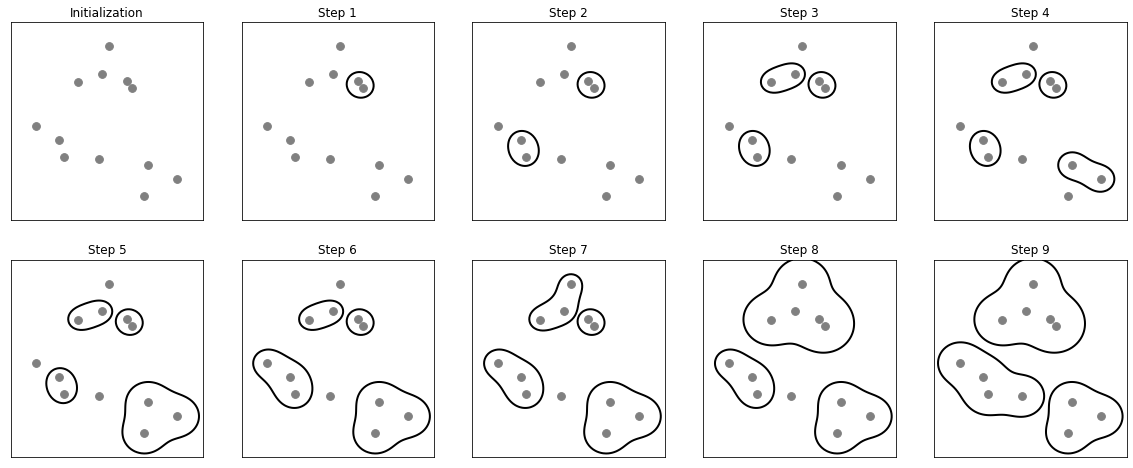

In [9]:
mglearn.plots.plot_agglomerative_algorithm()
plt.show()

This algorithm seems simple enough, but one issue has not been addressed.? We have a concept of the dissimilarity between pairs of observations, but how do we define the dissimilarity between two clusters if one or both of the clusters contains multiple observations?

The concept of dissimilarity between a pair of observations needs to be extended to a pair of groups of observations. This extension is achieved by developing the notion of linkage, which linkage defines the dissimilarity between two groups of observations.The four most common types of linkage — complete, average, single, and centroid:
![title](fig\fig11.png)

Average, complete, and single linkage are most popular among statisticians. Average and complete linkage are generally preferred over single linkage, as they tend to yield more balanced dendrograms. Centroid linkage is often used in genomics, but suffers from
a major drawback in that an inversion can occur, whereby two clusters are inversion fused at a height below either of the individual clusters in the dendrogram. This can lead to difficulties in visualization as well as in interpretation of the dendrogram.

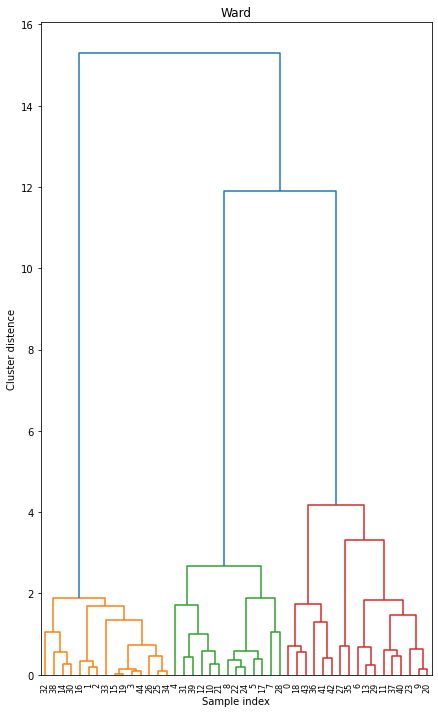

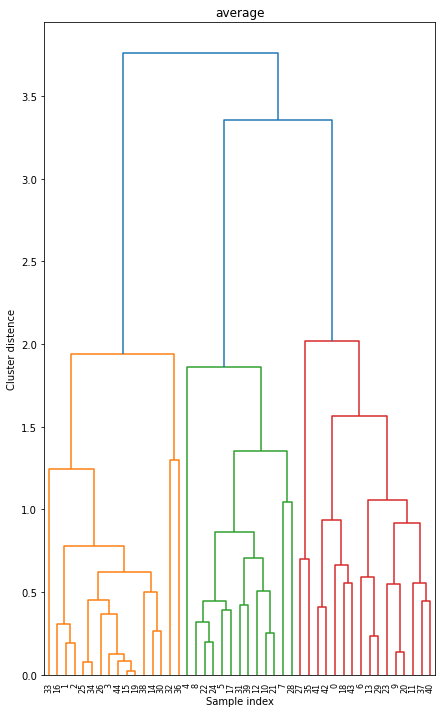

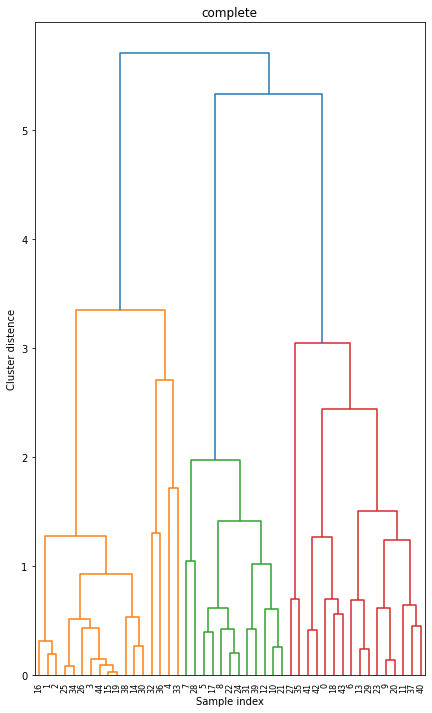

In [10]:
func=[ward,average,complete]
title=['Ward','average','complete']
for i in range(3):
    fig,ax= plt.subplots(nrows=1,ncols=1,figsize=(7,12))
    linkage_array=func[i](X)
    dendrogram(linkage_array,ax=ax)
    plt.xlabel("Sample index")
    plt.ylabel("Cluster distence")
    plt.title(title[i])
    plt.show()

#### 3. Choice of Dissimilarity Measure

Thus far, the examples in this chapter have used Euclidean distance as the dissimilarity measure. But sometimes other dissimilarity measures might be preferred. For example, correlation-based distance considers two observations to be similar if their features are highly correlated, even though the observed values may be far apart in terms of Euclidean distance.
![title](fig\fig12.png)

The choice of dissimilarity measure is very important, as it has a strong effect on the resulting dendrogram. In general, careful attention should be paid to the type of data being clustered and the scientific question at hand. These considerations should determine what type of dissimilarity measure is used for hierarchical clustering.

For instance, consider an online retailer interested in clustering shoppers based on their past shopping histories. If Euclidean distance is used, then shoppers who have bought very few items overall (i.e. infrequent users of the online shopping site) will be clustered together. This may not be desirable. On the other hand, if correlation-based distance is used, then shoppers with similar preferences (e.g. shoppers who have bought items A and B but never items C or D) will be clustered together, even if some shoppers with these preferences are higher-volume shoppers than others. Therefore, for this application, correlation-based distance may be a better choice.

In addition to carefully selecting the dissimilarity measure used, one must also consider whether or not the variables should be scaled to have standard deviation one before the dissimilarity between the observations is computed.

To illustrate this point, we continue with the online shopping example just described. Some items may be purchased more frequently than others; for instance, a shopper might buy ten pairs of socks a year, but a computer very rarely.
![title](fig\fig13.png)

* Left: The number of pairs of socks, and computers, purchased by eight online shoppers is displayed.
* Center: The same data is shown, after scaling each variable by its standard deviation.
* Right: The same data are displayed, but now the y-axis represents the number of dollars spent by each online shopper on socks and on computers.


### 10.3.3 Practical Issues in Clustering

* Should the observations or features first be standardized in some way? For instance, maybe the variables should be centered to have mean zero and scaled to have standard deviation one.
* In the case of hierarchical clustering,What dissimilarity measure should be used? What type of linkage should be used? Where should we cut the dendrogram in order to obtain clusters?
* In the case of K-means clustering, how many clusters should we look for in the data?

Both K-means and hierarchical clustering will assign each observation to a cluster. However, sometimes this might not be appropriate. For instance, suppose that most of the observations truly belong to a small number of (unknown) subgroups, and a small subset of the observations are quite different from each other and from all other observations.

In addition, clustering methods generally are not very robust to perturbations to the data. For instance, suppose that we cluster $n$ observations, and then cluster the observations again after removing a subset of the $n$ observations at random.

Since clustering can be non-robust, we recommend clustering subsets of the data in order to get a sense of the robustness of the clusters obtained. Most importantly, we must be careful about how the results of a clustering analysis are reported. These results should not be taken as the absolute truth about a data set. Rather, they should constitute a starting point for the development of a scientific hypothesis and further study, preferably on an independent data set.